# Navigation - Train an Agent

---

You are welcome to use this coding environment to train your agent for the banana project.  

### 1. Load important libraries and start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from unityagents import UnityEnvironment
from dqn_agent import DQNAgent, DDQNAgent, PRBDDQNAgent

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print(type(brain))
print(brain)

<class 'unityagents.brain.BrainParameters'>
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)

state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

print('state')
print(state)
print()
print('action ', action)  
print()
print('env_info')
print(env_info)
print()
print('next_state')
print(next_state)
print()
print('reward')
print(reward)
print()
print('done')
print(done)
print()
print("Score: {}".format(score))

state
[1.         0.         0.         0.         0.43962687 1.
 0.         0.         0.         0.19398789 1.         0.
 0.         0.         0.48112735 0.         0.         1.
 0.         0.52109712 0.         0.         1.         0.
 0.38285938 1.         0.         0.         0.         0.10405888
 1.         0.         0.         0.         0.37148571 0.
 0.        ]

action  0

env_info

next_state
[1.         0.         0.         0.         0.43962687 1.
 0.         0.         0.         0.19398789 1.         0.
 0.         0.         0.48112735 0.         0.         1.
 0.         0.52109712 0.         0.         1.         0.
 0.38285938 1.         0.         0.         0.         0.10405888
 1.         0.         0.         0.         0.37148571 0.
 0.        ]

reward
0.0

done
True

Score: 0.0


### 4. Train the Agent with simple DQN

Code cell below is used to train the agent from scratch. 

Local Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Target Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.49
Episode 300	Average Score: 7.53
Episode 400	Average Score: 9.93
Episode 500	Average Score: 12.75
Episode 517	Average Score: 13.01
Environment solved in 517 episodes!	Average Score: 13.01


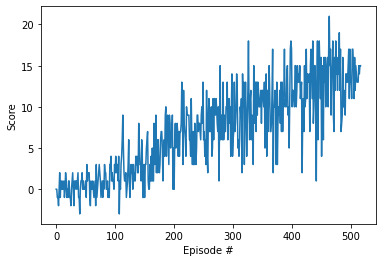

In [8]:
agent = DQNAgent(state_size=state_size, action_size=action_size, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """ Deep Q-Learning.
    
        INPUTS: 
        ------------
            n_episodes - (int) maximum number of training episodes
            max_t - (int) maximum number of timesteps per episode
            eps_start - (float) starting value of epsilon, for epsilon-greedy action selection
            eps_end - (float) minimum value of epsilon
            eps_decay - (float) multiplicative factor (per episode) for decreasing epsilon
            
        OUTPUTS:
        ------------
            scores - (list) list of scores
    """
    scores = []                        # list containing scores from each episode
    scores_avg = []                    # list containing the mean of the last 100 episodes
    scores_std = []                    # list containing the std dev of the last 100 episodes
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        state = env_info.vector_observations[0]                 # get the current state
        score = 0                                               # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                      # returns actions for current state and policy
            env_info = env.step(action)[brain_name]             # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # update the agent's knowledge
            state = next_state                                  # set next state as current state 
            score += reward                                     # update score with the return for this time step
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_avg.append(np.mean(scores_window)) # save most recent avg
        scores_std.append(np.std(scores_window)) # save most recent std dev
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores, scores_avg, scores_std

scores, scores_avg, scores_std = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

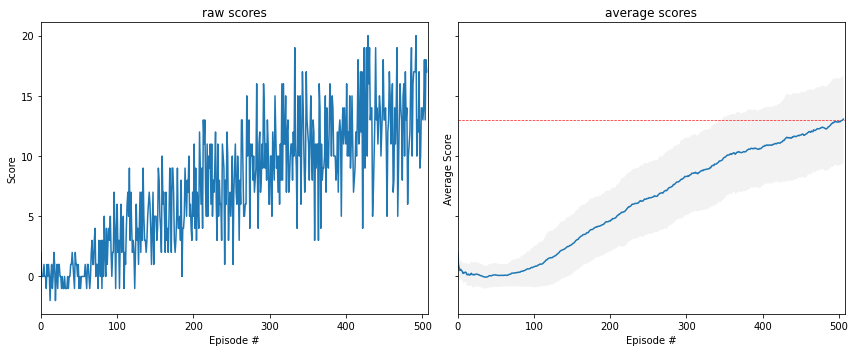

In [14]:
scores_raw = np.array(scores)
scores_mu = np.array(scores_avg)
scores_sigma = np.array(scores_std)

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(scores_raw)), scores_raw)
ax1.set_xlim(0, len(scores_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=13., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(scores_mu)), scores_mu)
ax2.fill_between(np.arange(len(scores_mu)), scores_mu+scores_sigma, scores_mu-scores_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average Score')
ax2.set_xlabel('Episode #')
ax2.set_title('average scores')

f.tight_layout()

### 5. Train the Agent with Double DQN (DDQN)

Code cell below is used to train the agent from scratch. 

Local Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Target Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Episode 100	Average Score: 0.57
Episode 200	Average Score: 4.58
Episode 300	Average Score: 7.08
Episode 400	Average Score: 11.28
Episode 500	Average Score: 12.75
Episode 515	Average Score: 13.00
Environment solved in 515 episodes!	Average Score: 13.00


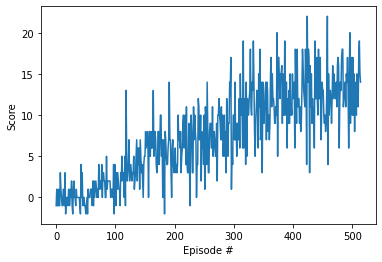

In [9]:
agent = DDQNAgent(state_size=state_size, action_size=action_size, seed=0)

def ddqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """ Deep Q-Learning.
    
        INPUTS: 
        ------------
            n_episodes - (int) maximum number of training episodes
            max_t - (int) maximum number of timesteps per episode
            eps_start - (float) starting value of epsilon, for epsilon-greedy action selection
            eps_end - (float) minimum value of epsilon
            eps_decay - (float) multiplicative factor (per episode) for decreasing epsilon
            
        OUTPUTS:
        ------------
            scores - (list) list of scores
    """
    scores = []                        # list containing scores from each episode
    scores_avg = []                    # list containing the mean of the last 100 episodes
    scores_std = []                    # list containing the std dev of the last 100 episodes
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        state = env_info.vector_observations[0]                 # get the current state
        score = 0                                               # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                      # returns actions for current state and policy
            env_info = env.step(action)[brain_name]             # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # update the agent's knowledge
            state = next_state                                  # set next state as current state 
            score += reward                                     # update score with the return for this time step
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_avg.append(np.mean(scores_window)) # save most recent avg
        scores_std.append(np.std(scores_window)) # save most recent std dev
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_ddqn.pth')
            break
    return scores, scores_avg, scores_std

scores, scores_avg, scores_std = ddqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

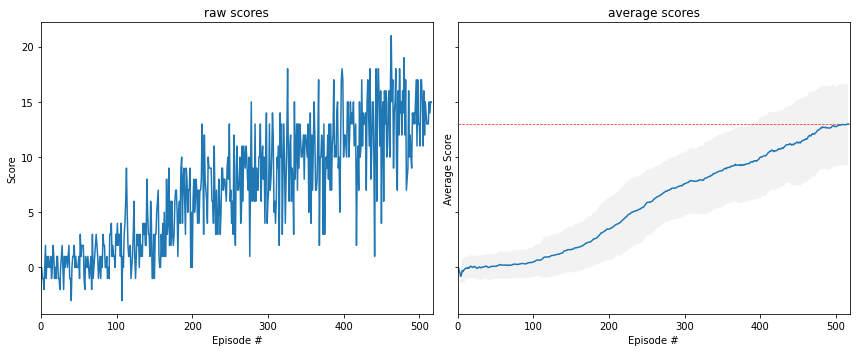

In [9]:
scores_raw = np.array(scores)
scores_mu = np.array(scores_avg)
scores_sigma = np.array(scores_std)

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(scores_raw)), scores_raw)
ax1.set_xlim(0, len(scores_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=13., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(scores_mu)), scores_mu)
ax2.fill_between(np.arange(len(scores_mu)), scores_mu+scores_sigma, scores_mu-scores_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average Score')
ax2.set_xlabel('Episode #')
ax2.set_title('average scores')

f.tight_layout()

### 6. Train the Agent with Priotirized Replay Buffer DDQN

Code cell below is used to train the agent from scratch. 

Local Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Target Netwrok: 
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Episode 100	Average Score: 0.93
Episode 200	Average Score: 4.24
Episode 300	Average Score: 7.29
Episode 400	Average Score: 9.80
Episode 500	Average Score: 12.49
Episode 514	Average Score: 13.04
Environment solved in 514 episodes!	Average Score: 13.04


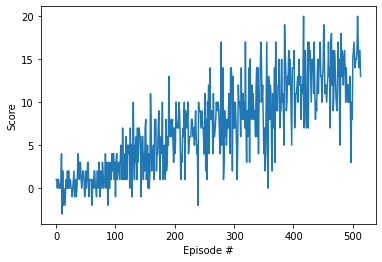

In [10]:
agent = PRBDDQNAgent(state_size=state_size, action_size=action_size, seed=0)

def prbddqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.001, eps_decay=0.995):
    """ Deep Q-Learning.
    
        INPUTS: 
        ------------
            n_episodes - (int) maximum number of training episodes
            max_t - (int) maximum number of timesteps per episode
            eps_start - (float) starting value of epsilon, for epsilon-greedy action selection
            eps_end - (float) minimum value of epsilon
            eps_decay - (float) multiplicative factor (per episode) for decreasing epsilon
            
        OUTPUTS:
        ------------
            scores - (list) list of scores
    """
    scores = []                        # list containing scores from each episode
    scores_avg = []                    # list containing the mean of the last 100 episodes
    scores_std = []                    # list containing the std dev of the last 100 episodes
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        state = env_info.vector_observations[0]                 # get the current state
        score = 0                                               # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                      # returns actions for current state and policy
            env_info = env.step(action)[brain_name]             # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # update the agent's knowledge
            state = next_state                                  # set next state as current state 
            score += reward                                     # update score with the return for this time step
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_avg.append(np.mean(scores_window)) # save most recent avg
        scores_std.append(np.std(scores_window)) # save most recent std dev
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_prb_ddqn.pth')
            break
    return scores, scores_avg, scores_std

scores, scores_avg, scores_std = prbddqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

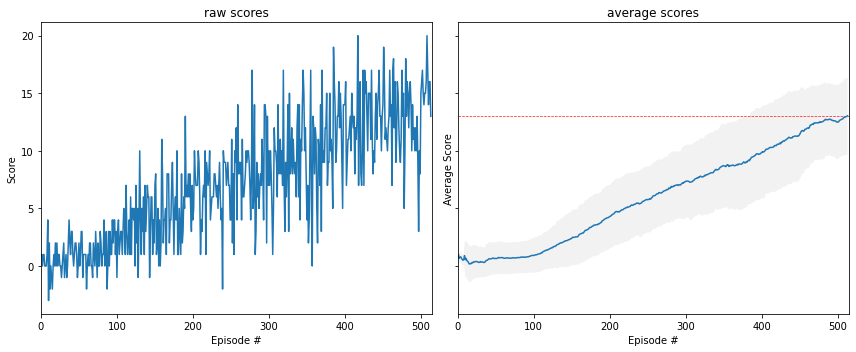

In [11]:
scores_raw = np.array(scores)
scores_mu = np.array(scores_avg)
scores_sigma = np.array(scores_std)

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(scores_raw)), scores_raw)
ax1.set_xlim(0, len(scores_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=13., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(scores_mu)), scores_mu)
ax2.fill_between(np.arange(len(scores_mu)), scores_mu+scores_sigma, scores_mu-scores_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average Score')
ax2.set_xlabel('Episode #')
ax2.set_title('average scores')

f.tight_layout()

When finished, you can close the environment.

In [10]:
env.close()

###  A few **important notes**:

- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- In this coding environment, you cannot watch the behaviour of the trained agent. However, **_after training the agent_**, you can use the saved model weights (**checkpoint.pth**) together with the **Navigation_Trained_Agent.ipynb** notebook to watch the agent on your machine! 